# Rainfall Weather Forecasting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.shape

(8425, 23)

In [5]:
data.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
5486,2010-03-09,Melbourne,16.2,21.2,7.0,3.0,7.3,WSW,57.0,W,...,62.0,36.0,1013.4,1016.8,3.0,6.0,18.0,19.9,Yes,No
4909,2010-10-29,Melbourne,13.9,28.4,0.0,7.0,9.6,N,61.0,N,...,52.0,33.0,1013.3,1008.7,3.0,5.0,20.9,27.0,No,Yes
1396,2010-07-12,CoffsHarbour,12.6,20.9,0.0,2.8,7.8,SSE,20.0,N,...,68.0,74.0,1022.4,1020.4,7.0,5.0,17.4,19.4,No,No
1653,2013-10-22,Newcastle,18.6,28.2,0.0,NaN,NaN,NaN,NaN,SE,...,73.0,59.0,NaN,NaN,6.0,5.0,23.4,27.7,No,No
6098,2011-12-11,Melbourne,14.8,20.5,NaN,4.8,4.1,SSE,43.0,SW,...,75.0,55.0,1008.0,1007.5,NaN,NaN,15.7,18.6,NaN,Yes
4706,2010-04-09,Melbourne,13.5,21.7,0.0,2.6,2.3,N,26.0,N,...,82.0,49.0,1015.2,1011.2,6.0,7.0,15.6,21.4,No,No
7631,2012-11-26,PerthAirport,15.2,30.1,0.0,7.0,12.7,W,35.0,ENE,...,56.0,50.0,1015.4,1010.3,3.0,1.0,24.0,26.9,No,No
2579,2015-01-14,Penrith,21.4,32.7,0.8,NaN,NaN,WNW,48.0,N,...,50.0,34.0,NaN,NaN,NaN,NaN,28.3,31.9,No,No
4633,2010-01-26,Melbourne,13.8,24.5,0.0,7.0,9.9,S,43.0,SSW,...,69.0,60.0,1011.5,1012.3,7.0,2.0,17.8,22.5,No,No
952,2009-04-24,CoffsHarbour,11.5,24.8,0.0,2.2,9.5,N,33.0,NW,...,63.0,61.0,1014.7,1009.7,2.0,7.0,20.3,23.2,No,No


In [6]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [7]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [10]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i] = OE.fit_transform(data[i].values.reshape(-1,1))

In [11]:
data['MinTemp'].fillna(data['MinTemp'].median(), inplace=True)

In [12]:
data.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [13]:
data['MaxTemp'].fillna(data['MaxTemp'].median(), inplace=True)

In [14]:
data['Rainfall'].fillna(data['Rainfall'].median(), inplace=True)

In [15]:
data['Evaporation'].fillna(data['Evaporation'].median(), inplace=True)

In [16]:
data['Sunshine'].fillna(data['Sunshine'].median(), inplace=True)

In [17]:
data['WindGustDir'].fillna(data['WindGustDir'].median(), inplace=True)

In [18]:
data['WindGustSpeed'].fillna(data['WindGustSpeed'].median(), inplace=True)

In [19]:
data['WindDir9am'].fillna(data['WindDir9am'].median(), inplace=True)

In [20]:
data['WindDir3pm'].fillna(data['WindDir3pm'].median(), inplace=True)

In [21]:
data['WindSpeed9am'].fillna(data['WindSpeed9am'].median(), inplace=True)

In [22]:
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].median(), inplace=True)

In [23]:
data['Humidity9am'].fillna(data['Humidity9am'].median(), inplace=True)

In [24]:
data['Humidity3pm'].fillna(data['Humidity3pm'].median(), inplace=True)

In [25]:
data['Pressure9am'].fillna(data['Pressure9am'].median(), inplace=True)

In [26]:
data['Pressure3pm'].fillna(data['Pressure3pm'].median(), inplace=True)

In [27]:
data['Cloud9am'].fillna(data['Cloud9am'].median(), inplace=True)

In [28]:
data['Cloud3pm'].fillna(data['Cloud3pm'].median(), inplace=True)

In [29]:
data['Temp9am'].fillna(data['Temp9am'].median(), inplace=True)

In [30]:
data['Temp3pm'].fillna(data['Temp3pm'].median(), inplace=True)

In [31]:
data['RainToday'].fillna(data['RainToday'].median(), inplace=True)

In [32]:
data['RainTomorrow'].fillna(data['RainTomorrow'].median(), inplace=True)

In [33]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<AxesSubplot:>

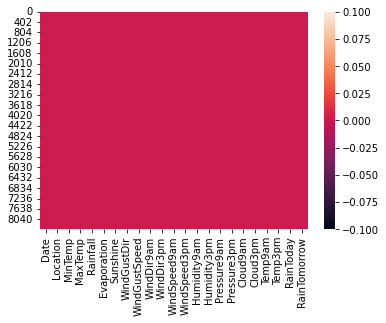

In [34]:
sns.heatmap(data.isnull())

<AxesSubplot:>

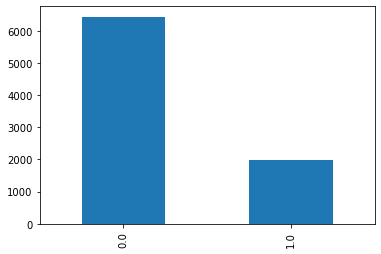

In [35]:
data['RainToday'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Evaporation', ylabel='Density'>

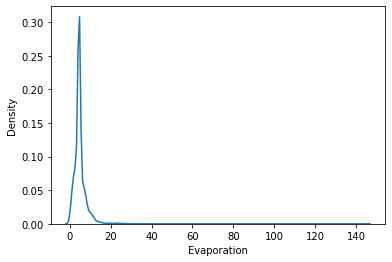

In [36]:
sns.kdeplot(data['Evaporation'])

<AxesSubplot:ylabel='RainTomorrow'>

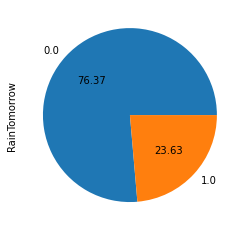

In [37]:
data['RainTomorrow'].value_counts().plot(kind="pie",autopct="%0.2f")

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [39]:
X = data.drop('RainTomorrow', axis=1)
y = data['RainTomorrow']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [42]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
y_pred = clf.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.91


In [45]:
import pickle
filename='Rainfall Weather Forecasting.pkl'
pickle.dump(clf, open(filename, 'wb'))